In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

### House Prediction

#### Making the dataset

In [11]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
y_train = np.array([[300.0], [500.0]], dtype=np.float32)

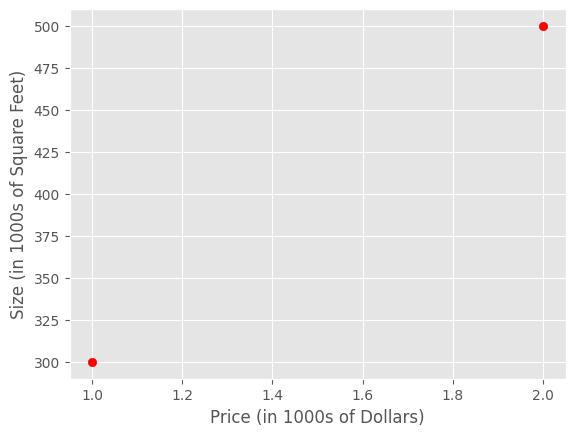

In [13]:
plt.scatter(X_train, y_train, marker='o', c='r', label="Data Points")
plt.xlabel("Price (in 1000s of Dollars)")
plt.ylabel("Size (in 1000s of Square Feet)")
plt.show()

#### Regression Model

The function implemented in neuron without any activation is the same as the linear regression

In [14]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

In [15]:
linear_layer.get_weights()

[]

There are no weights as they are not instantiated. When the X_train is added, it will trigger the instantiation of the weights.

In [19]:
a1 = linear_layer(X_train[0].reshape(1,1)) # reshaped because the input needs to be in 2D
print(a1)

tf.Tensor([[1.1644005]], shape=(1, 1), dtype=float32)


Result will a tensor (a tensorflow array) with the shape of (1,1) or having one entry. The weights are randomly initialized to small numbers and the bias is defaulted to 0.

In [21]:
w, b = linear_layer.get_weights()
print(f"Weights: {w}, Bias: {b}")

Weights: [[1.1644005]], Bias: [0.]


Lets set the weights and bias

In [24]:
set_w = np.array([[200]])
set_b = np.array([100])

In [25]:
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Lets compare the equation 1 to the layer output

In [27]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


Making Predictions

In [28]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

In [29]:
print(f"TensorFlow Prediction: {prediction_tf}")
print(f"Numpy Prediction: {prediction_np}")

TensorFlow Prediction: [[300.]
 [500.]]
Numpy Prediction: [[300.]
 [500.]]


### Neuron with Sigmoid activation

The function implemented in neuron with activation is the same as the logistic regression

#### Dataset

In [36]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [31]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

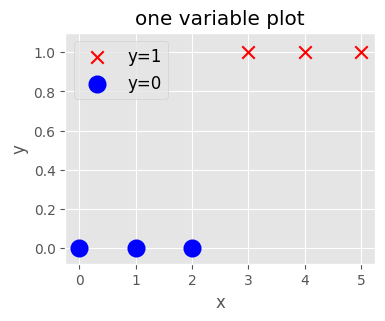

In [35]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, c='b', label="y=0", facecolors='none', lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

#### Logistic Neuron

We can implement by adding a sigmoid activation. We will create a TensorFlow model that contains our logistic layer to demonstrate an alternate method of creating models. Tf is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [37]:
model = tf.keras.Sequential (
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name="L1")
    ]
)

C:\Users\shahe\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(f"Weights: {w}, Bias: {b}")

Weights: [[1.0799071]], Bias: [0.]


Setting the weights and bias to known values

In [41]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Let's compare equation (2) to the layer output.

In [44]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
a_1 = math.e ** (np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
alog = 1/(1+a_1)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[0.01098694]]
[[0.98901306]]
